In [1]:
import matplotlib.pyplot as plt 
from matplotlib.animation import FuncAnimation, FFMpegWriter 
import plots 
plots.mpltoolkit.load_mpl_presets() 
import numpy as np 
import vice 
import sys 
sys.path.append("..") 
import src 

/Users/astrobeard/.local/lib/python3.7/site-packages/vice-1.3.0-py3.7-macosx-10.9-x86_64.egg/vice/__init__.py:136: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)
../src/plots/env.py:42: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  mpl.rcParams["text.latex.preamble"] = [r"\usepackage{amsmath}"]


/Users/astrobeard/.local/lib/python3.7/site-packages/vice-1.3.0-py3.7-macosx-10.9-x86_64.egg/vice/core/outputs/output.py:131: UserWarning: agb n yield not encoded with output. Assuming the current yield setting, which may not reflect the yield setting at the time the simulation was ran.
  self.__c_version = c_output(name)


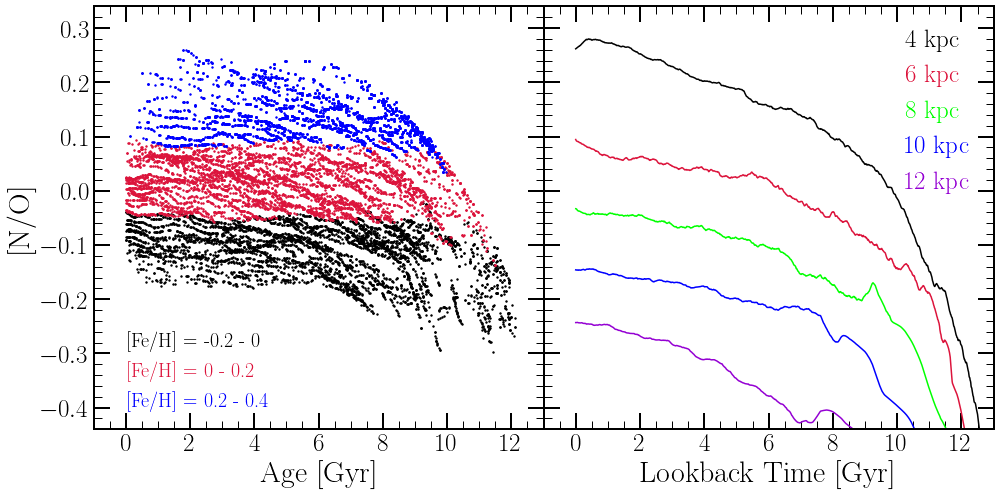

In [7]:
fig = plt.figure(figsize = (14, 7), facecolor = "white") 
ax1 = fig.add_subplot(121) 
ax2 = fig.add_subplot(122, sharey = ax1) 
for ax in [ax1, ax2]: 
    ax.set_xlim([-1, 13]) 
    ax.set_xticks(range(0, 14, 2)) 
ax1.set_xlabel("Age [Gyr]") 
ax2.set_xlabel("Lookback Time [Gyr]") 
ax1.set_ylabel("[N/O]") 
ax1.set_ylim([-0.44, 0.34]) 
plt.setp(ax2.get_yticklabels(), visible = False) 


out = vice.output("../outputs/diffusion/insideout") 
feh_bins = [[-0.2, 0.0], [0.0, 0.2], [0.2, 0.4]] 
colors = ["black", "crimson", "blue"] 
stars = out.stars.filter(
    "zone_final", ">=", 70).filter(
    "zone_final", "<=", 90) 


for i in range(len(feh_bins)): 
    sub = stars.filter("[fe/h]", ">=", feh_bins[i][0]).filter("[fe/h]", "<=", feh_bins[i][1]) 
    mass_fracs = [_ / sum(sub["mass"]) for _ in sub["mass"]] 
    indeces = np.random.choice(len(mass_fracs), size = 5000, p = mass_fracs) 
    ages = [sub["age"][index] for index in indeces] 
    no = [sub["[n/o]"][index] for index in indeces] 
    feh = [sub["[fe/h]"][index] for index in indeces] 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()[colors[i]], 
        "s": 2, 
        "label": "[Fe/H] = %g - %g" % (feh_bins[i][0], feh_bins[i][1]) 
    } 
    ax1.scatter(ages, no, **kwargs) 
leg1 = ax1.legend(loc = plots.mpltoolkit.mpl_loc("lower left"), ncol = 1, frameon = False, 
    handlelength = 0, fontsize = 20) 
for i in range(len(feh_bins)): 
    leg1.get_texts()[i].set_color(colors[i]) 
    leg1.legendHandles[i].set_visible(False) 


zones = ["zone40", "zone60", "zone80", "zone100", "zone120"] 
labels = ["4 kpc", "6 kpc", "8 kpc", "10 kpc", "12 kpc"] 
colors = ["black", "crimson", "lime", "blue", "darkviolet"] 
for i in range(len(zones)): 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()[colors[i]], 
        "label": labels[i] 
    } 
    ax2.plot(out.zones[zones[i]].history["lookback"], 
        out.zones[zones[i]].history["[n/o]"], **kwargs) 
leg2 = ax2.legend(loc = plots.mpltoolkit.mpl_loc("upper right"), ncol = 1, frameon = False, 
    handlelength = 0) 
for i in range(len(zones)): 
    leg2.get_texts()[i].set_color(colors[i]) 
    leg2.legendHandles[i].set_visible(False) 


plt.tight_layout() 
plt.subplots_adjust(wspace = 0) 